In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

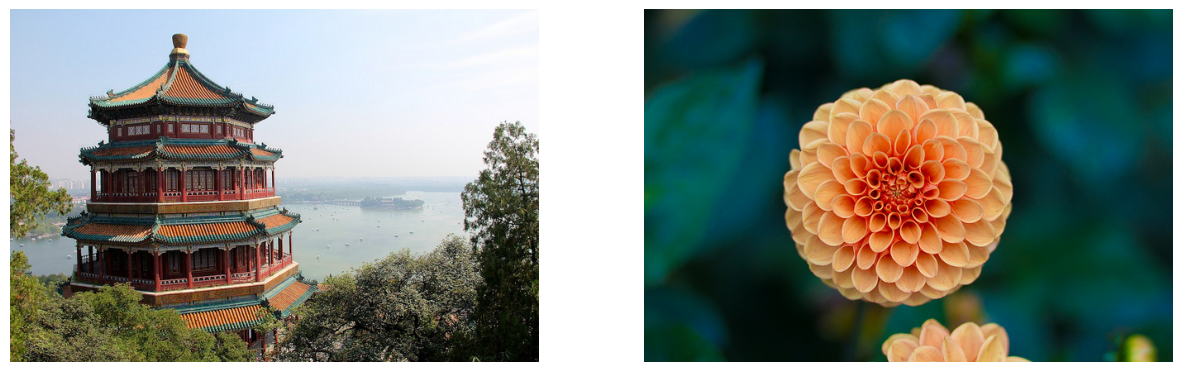

In [ ]:
images = load_sample_images()['images']
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

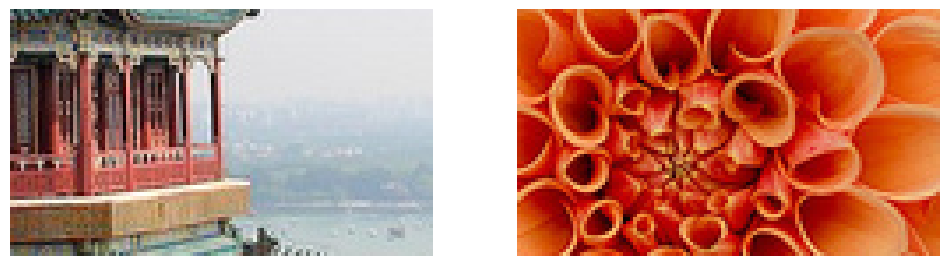

In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1/255.)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters= 32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

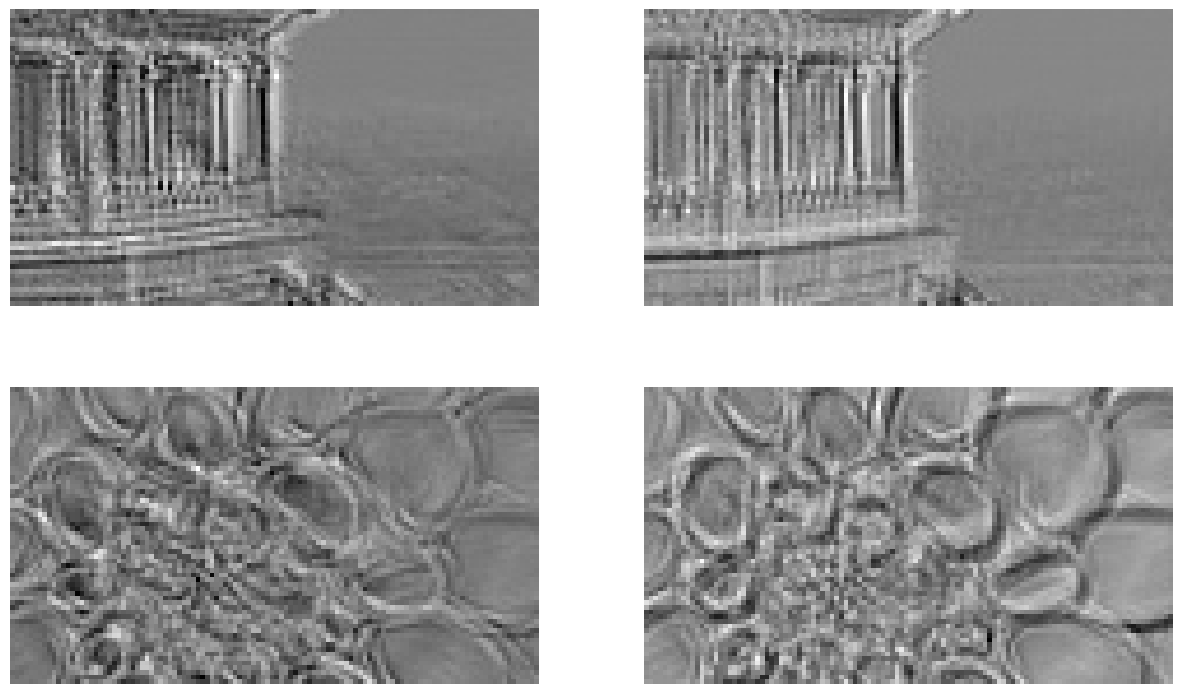

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in(0,1):
  for fmap_idx in(0,1):
    plt.subplot(2,2, image_idx*2+fmap_idx+1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx+22], cmap = 'gray')
    plt.axis('off')

plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size = 7, padding= 'same')
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size = 7, padding= 'same', strides=2)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7,7,3,2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding='SAME')+biases

# Pooling Layer

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool(images)

In [ ]:
global_avg_pool  = tf.keras.layers.GlobalAvgPool2D()

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
global_avg_pool = tf.keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1,2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

In [ ]:
images[0].shape, global_avg_pool(images)[0].shape

(TensorShape([70, 120, 3]), TensorShape([3]))

# CNN Architectures

In [ ]:
import numpy as np

mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1)/255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1)/255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Nadam(1e-3),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.5718 - loss: 1.1999 - val_accuracy: 0.8682 - val_loss: 0.3682
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8495 - loss: 0.4506 - val_accuracy: 0.8890 - val_loss: 0.3217
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8780 - loss: 0.3674 - val_accuracy: 0.8998 - val_loss: 0.2763
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8916 - loss: 0.3270 - val_accuracy: 0.9066 - val_loss: 0.2724
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9029 - loss: 0.2912 - val_accuracy: 0.9066 - val_loss: 0.2710
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9075 - loss: 0.2804 - val_accuracy: 0.8932 - val_loss: 0.2920
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9130 - loss: 0.2599 - val_accuracy: 0.9100 - val_loss: 0.2613
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9184 - loss: 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,505 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,671 (10.79 MB)

# Implementing Res-Net-34 CNN Using Keras

In [ ]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding='same', kernel_initializer='he_normal', use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.activation = tf.keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers=[]
    if strides>1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]
  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z=layer(Z)
    skip_Z = inputs
    for layer in self.main_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z+skip_Z)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    DefaultConv2D(64, kernel_size=7, strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
])

prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
  strides=1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters=filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'residual_unit_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'residual_unit_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'residual_unit_13', however the la

In [ ]:
# model.compile(loss='SparseCategoricalCrossentropy',
#               optimizer = tf.keras.optimizers.Nadam(1e-3),
#               metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit (ResidualUnit)         │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_1 (ResidualUnit)       │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_2 (ResidualUnit)       │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_3 (ResidualUnit)       │ (None, 4, 4, 128)           │         222,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_4 (ResidualUnit)       │ (None, 4, 4, 128)           │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_5 (ResidualUnit)       │ (None, 4, 4, 128)           │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_6 (ResidualUnit)       │ (None, 4, 4, 128)           │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_7 (ResidualUnit)       │ (None, 2, 2, 256)           │         886,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_8 (ResidualUnit)       │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_9 (ResidualUnit)       │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_10 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_11 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_12 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_13 (ResidualUnit)      │ (None, 1, 1, 512)           │       3,543,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_14 (ResidualUnit)      │ (None, 1, 1, 512)           │       4,722,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_15 (ResidualUnit)      │ (None, 1, 1, 512)           │       4,722,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │              

 Total params: 63,344,353 (241.64 MB)

 Trainable params: 21,109,706 (80.53 MB)

 Non-trainable params: 15,232 (59.50 KB)

 Optimizer params: 42,219,415 (161.05 MB)

# Using Pretrained Models from Keras

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
images = load_sample_images()['images']

images_stacked = tf.stack(images, axis=0)

images_resized = tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True)(images_stacked)

In [ ]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
inputs = tf.cast(inputs, tf.float32)

In [ ]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(2, 1000)

In [ ]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id, name, y_proba in top_K[image_index]:
    print(f"{class_id} - {name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Image #0
n03877845 - palace       54.83%
n03781244 - monastery    24.40%
n02825657 - bell_cote    18.74%
Image #1
n04522168 - vase         32.17%
n11939491 - daisy        17.87%
n03530642 - honeycomb    12.03%


# Pretrained Models for Transfer Learning

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.96FFIX_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    'tf_flowers',
    split = ['train[:10%]', 'train[10%:25%]', 'train[25%:]'],
    as_supervised=True)

In [ ]:
train_set_raw

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

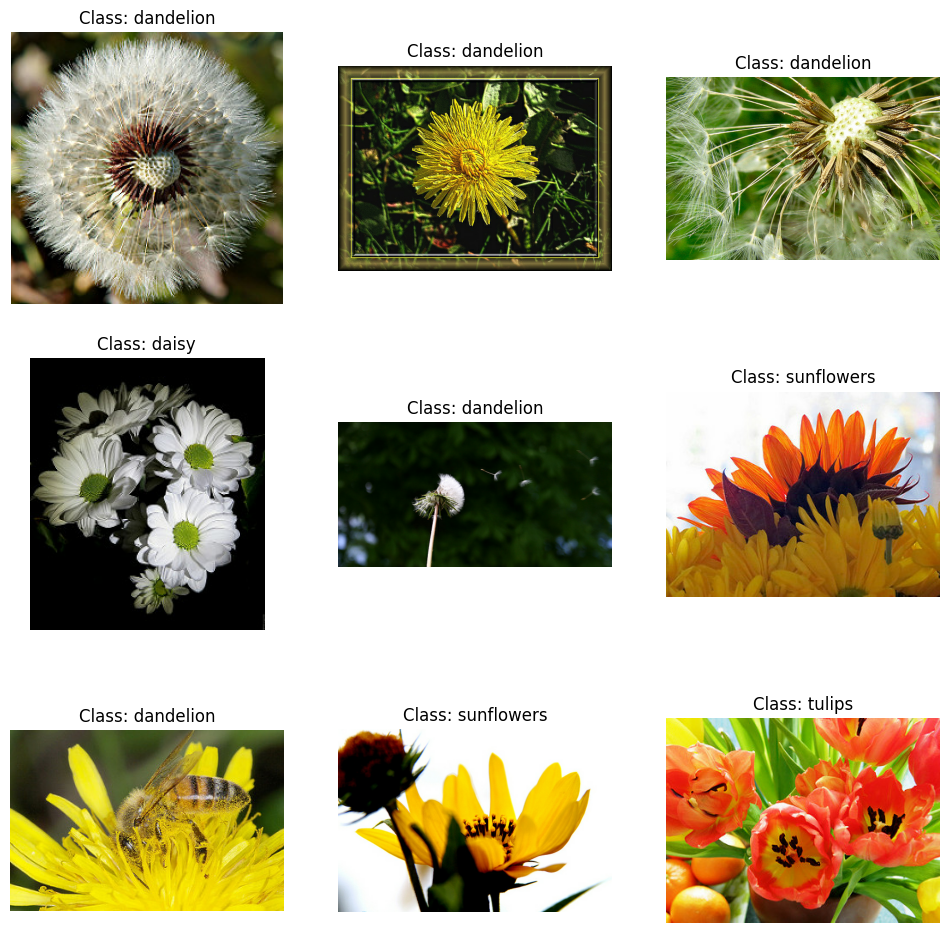

In [ ]:
import matplotlib.pyplot as plt

index = 0
plt.figure(figsize=(12,12))
for image, label in train_set_raw.take(9):
  index+=1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title('Class: {}'.format(class_names[label]))
  plt.axis('off')
plt.show();

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

preprocessing = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

In [ ]:
batch_size = 32
train_set = train_set_raw.map(lambda X,y:(preprocessing(X),y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X,y:(preprocessing(X),y)).batch(batch_size)
test_set = test_set_raw.map(lambda X,y:(preprocessing(X),y)).batch(batch_size)

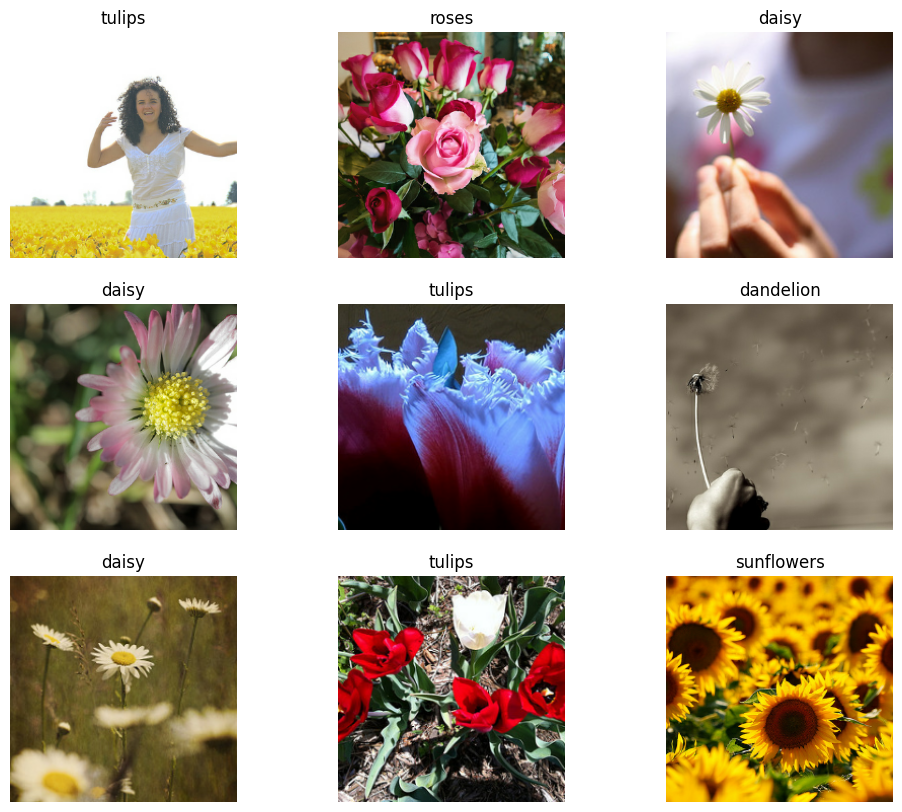

In [ ]:
plt.figure(figsize=(12,10))
for X_batch, y_batch in train_set.take(1):
  for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow(X_batch[index]/2+0.5)
    plt.title(class_names[y_batch[index]])
    plt.axis('off')

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal', seed=42),
    tf.keras.layers.RandomRotation(factor=0.1, seed=42)
    # tf.keras.layers.RandomContrast(frac=0.2,seed=42)
])

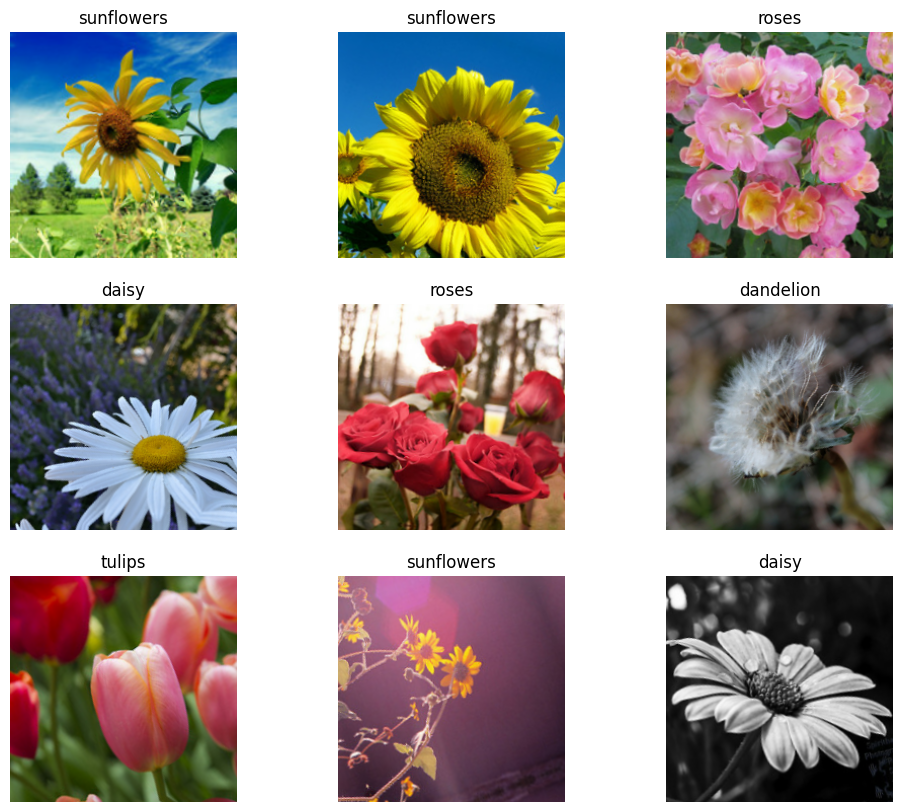

In [ ]:
import numpy as np

plt.figure(figsize=(12,10))
for X_batch, y_batch in train_set.take(1):
  X_batch_augmented = data_augmentation(X_batch)
  for index in range(9):
    plt.subplot(3,3, index+1)
    plt.imshow(X_batch_augmented[index]/2+0.5)
    plt.axis('off')
    plt.title(class_names[y_batch[index]])

In [ ]:
tf.random.set_seed(42)

base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation = 'softmax')(avg)
model = tf.keras.Model(inputs=base_model.input, outputs = output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=optimizer,
              metrics = ['accuracy'])
history = model.fit(train_set, validation_data = valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - accuracy: 0.6797 - loss: 1.2370 - val_accuracy: 0.8385 - val_loss: 0.8894
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.8931 - loss: 0.4429 - val_accuracy: 0.8657 - val_loss: 0.5794
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.9490 - loss: 0.1557 - val_accuracy: 0.8748 - val_loss: 0.5368


In [ ]:
for layer in base_model.layers[56:]:
  layer.traineble = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss = 'SparseCategoricalCrossentropy',
              optimizer=optimizer,
              metrics = ['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.9753 - loss: 0.0715 - val_accuracy: 0.8820 - val_loss: 0.5327
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.9883 - loss: 0.0475 - val_accuracy: 0.8838 - val_loss: 0.5277
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.9910 - loss: 0.0459 - val_accuracy: 0.8784 - val_loss: 0.5171
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.9893 - loss: 0.0423 - val_accuracy: 0.8766 - val_loss: 0.5155
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9910 - loss: 0.0421 - val_accuracy: 0.8730 - val_loss: 0.5222
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9947 - loss: 0.0292 - val_accuracy: 0.8784 - val_loss: 0.5150
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9929 - loss: 0.0372 - val_accuracy: 0.8711 - val_loss: 0.5151
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.9936 - loss: 0.0354 - val_accu